<a target="_blank" href="https://colab.research.google.com/github/etesys/FinRL/blob/master/3-Practical/FinRL_PaperTrading_Demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install yahoofinancials
from yahoofinancials import YahooFinancials
%matplotlib inline

# Download Data

In [26]:
start_date = '2017-01-01'
end_date = '2017-12-31'
stock_code = 'NVDA'

In [27]:
stock_data = YahooFinancials(stock_code).get_historical_price_data(start_date, end_date, 'daily')
price_data = stock_data[stock_code]['prices']

In [28]:
columns = ['formatted_date', 'open', 'high', 'low', 'close', 'adjclose', 'volume']
new_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
# order dataframe columns
df = pd.DataFrame(data=price_data)[columns]
# rename dataframe columns
df = df.rename(index=str, columns=dict(zip(columns, new_columns)))

In [29]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,26.100000,26.592501,24.844999,25.502501,25.134888,150199600
1,2017-01-04,25.850000,26.375000,25.382500,26.097500,25.721315,119922000
2,2017-01-05,26.132500,26.455000,25.262501,25.434999,25.068363,98429600
3,2017-01-06,25.712500,26.062500,25.299999,25.775000,25.403458,82285600
4,2017-01-09,25.875000,27.000000,25.875000,26.820000,26.433392,91624800
5,2017-01-10,26.952499,27.297501,26.407499,26.617500,26.233814,88092000
6,2017-01-11,26.500000,26.549999,26.037500,26.290001,25.911039,52566400
7,2017-01-12,26.057501,26.174999,25.405001,25.860001,25.487236,62561600
8,2017-01-13,25.900000,26.250000,25.764999,25.857500,25.484774,45782000
9,2017-01-17,25.750000,25.799999,25.142500,25.277500,24.913134,58061200


In [30]:
# import os
# os.makedirs('../data')
# save to 'data' directory
df.to_csv('../data/{}_{}.csv'.format(stock_code, start_date[:4]))
!ls ../data

NVDA_2017.csv


Alternatively, we can go to https://finance.yahoo.com/ to look up a stock and download its historical data by setting the stock's time period and frequency.

# Visualize Data

In [31]:
#df = pd.read_csv('../data/^GSPC_2016.csv')
df = pd.read_csv('../data/NVDA_2017.csv')
df.head(10)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2017-01-03,26.100000,26.592501,24.844999,25.502501,25.134888,150199600
1,1,2017-01-04,25.850000,26.375000,25.382500,26.097500,25.721315,119922000
2,2,2017-01-05,26.132500,26.455000,25.262501,25.434999,25.068363,98429600
3,3,2017-01-06,25.712500,26.062500,25.299999,25.775000,25.403458,82285600
4,4,2017-01-09,25.875000,27.000000,25.875000,26.820000,26.433392,91624800
5,5,2017-01-10,26.952499,27.297501,26.407499,26.617500,26.233814,88092000
6,6,2017-01-11,26.500000,26.549999,26.037500,26.290001,25.911039,52566400
7,7,2017-01-12,26.057501,26.174999,25.405001,25.860001,25.487236,62561600
8,8,2017-01-13,25.900000,26.250000,25.764999,25.857500,25.484774,45782000
9,9,2017-01-17,25.750000,25.799999,25.142500,25.277500,24.913134,58061200


In [32]:
df.shape

(251, 8)

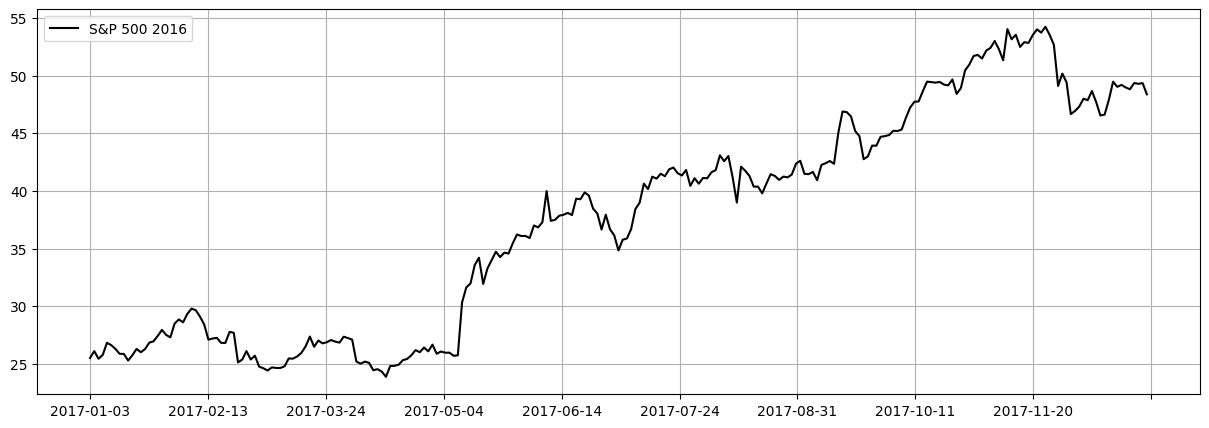

In [33]:
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df['Date'], df['Close'], color='black', label='S&P 500 2016')
plt.xticks(np.linspace(0, len(df), 10))
plt.legend()
plt.grid()

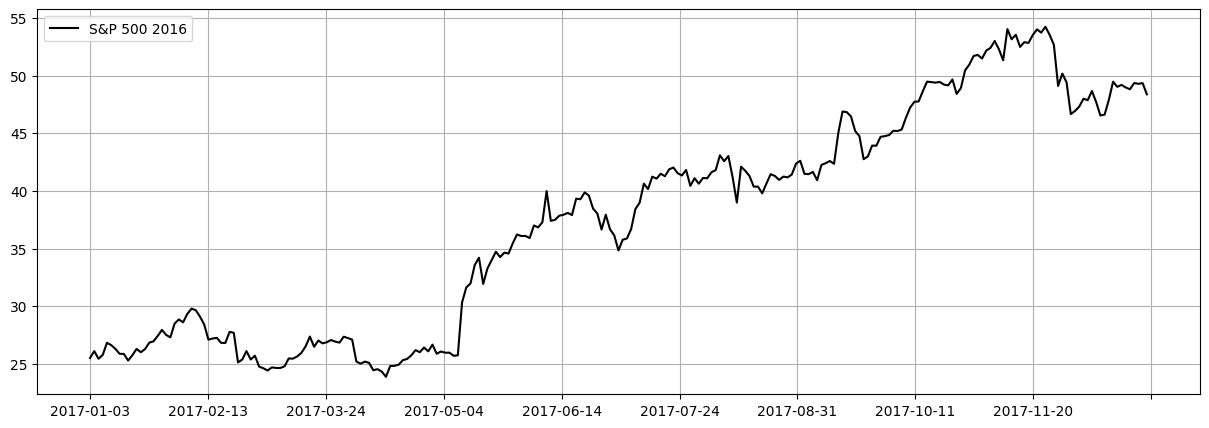

In [34]:
fig = plt.figure(figsize=(15, 5), dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(df['Date'], df['Close'], color='black', label='S&P 500 2016')
ax.set_xticks(np.linspace(0, len(df), 10))
ax.legend()
ax.grid()